'General solution:'

[x(t) == e^t*x(0), y(t) == e^(2*t)*x(0) - e^t*x(0)]

'Solution for x(0) = 1 and y(0) = 0:'

[x(t) == e^t, y(t) == e^(2*t) - e^t]

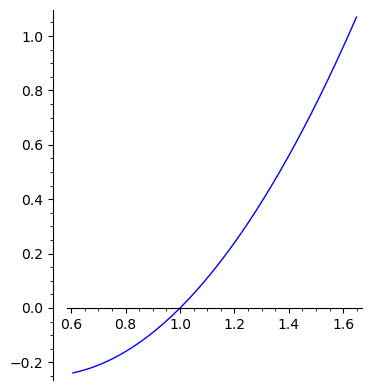

In [60]:
# Exercise 1
# System: diff(x, t) = x
#         diff(y, t) = x + 2 * y
# a) find the general solution of the system
# b) find the solution of the IVP: x(0) = 1, y(0) = 0
# c) plot the planar curve of the solution from b) an the interval t in [-1 / 2, 1 / 2]

t = var('t')
x = function('x')(t)
y = function('y')(t)

eq_1 = diff(x, t) == x
eq_2 = diff(y, t) == x + 2 * y
syst = [eq_1, eq_2]

gen_sol = desolve_system(syst, [x, y])
par_sol = desolve_system(syst, [x, y], ics=[0, 1, 0])

show('General solution:')
show(gen_sol)
show('Solution for x(0) = 1 and y(0) = 0:')
show(par_sol)

show(parametric_plot((exp(t), exp(2 * t) - exp(t)), (t, -1 / 2, 1 / 2)))

'Solution for x(0) = 2 and diff(x, t) = a:'

-t^2 + (a + 2)*e^t - a - 2*t

'Solution for x(0) = 2 and diff(x, t) = -2:'

-t^2 - 2*t + 2

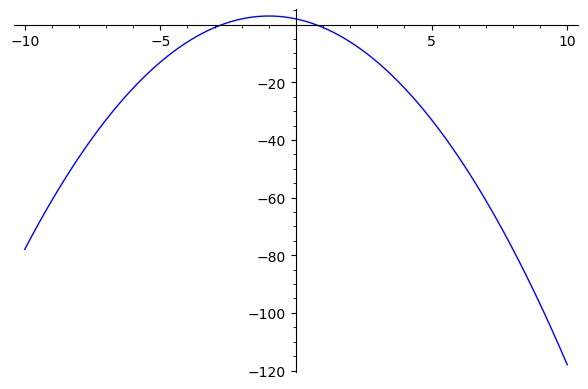

In [61]:
# Exercise 2
# IVP: diff(x, t, 2) - diff(x, t) - 2 * t = 0
#      x(0) = 2, diff(x, t) = a
# a) find the solution of the IVP 
# b) for what a is the solution a polynomial one?
# c) plot the solution (for any a)

t = var('t')
a = var('a')
x = function('x')(t)

eq = diff(x, t, 2) - diff(x, t) - 2 * t == 0

sol = desolve(eq, x, ics=[0, 2, a])
show('Solution for x(0) = 2 and diff(x, t) = a:')
show(sol)

pol_sol = sol.subs(a=-2)
show('Solution for x(0) = 2 and diff(x, t) = -2:')
show(pol_sol)

show(plot(pol_sol, -10, 10))

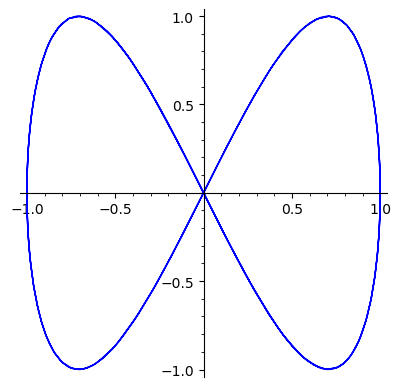

In [62]:
# Exercise 3
# Plot the planar curve of the parametric equations:
#     diff(x, t) = sin(t)
#     diff(y, t) = sin(2 * t)

t = var('t')

show(parametric_plot((sin(t), sin(2 * t)), (t, -10, 10)))

In [63]:
# Exercise 4
# IVP: diff(y, x) = 2 * x * (1 + y^2)
#      y(0) = 1
# a) Using the Improved Euler approximation method with a step size h = 0.01 compute the approximate value at x = 0.5
# b) Plot the approximation compared with the exact solution

x = var('x')
y = function('y')(x)

eq = diff(y, x) == 2 * x * (1 + y^2)
sol = desolve(eq, y, ics=[0, 1])

show('Solution:')
show(sol)

# if 1 / 2 * arctan(y(x)) = 1 / 8 * pi + 1 / 2 * x^2
# then y(x) = tan(1 / 4 * pi + x^2)
show('Another form:')
show(y == tan(1 / 4 * pi + x^2))

'Solution:'

1/2*arctan(y(x)) == 1/8*pi + 1/2*x^2

'Another form:'

y(x) == tan(1/4*pi + x^2)

'Exact value:'

1.68579641716834

'Improved Euler approximation value:'

1.68575259170225

'Error:'

0.0000438254660932724

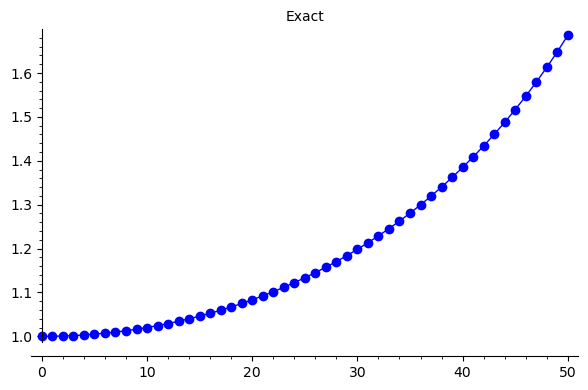

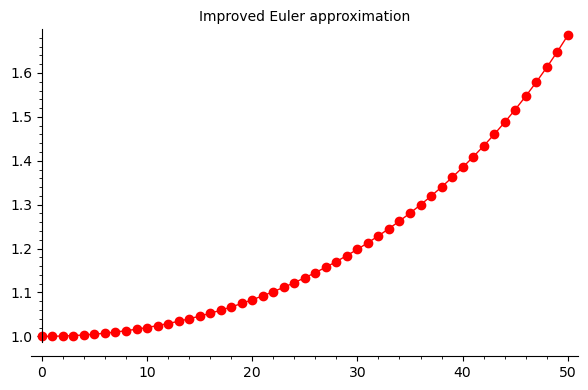

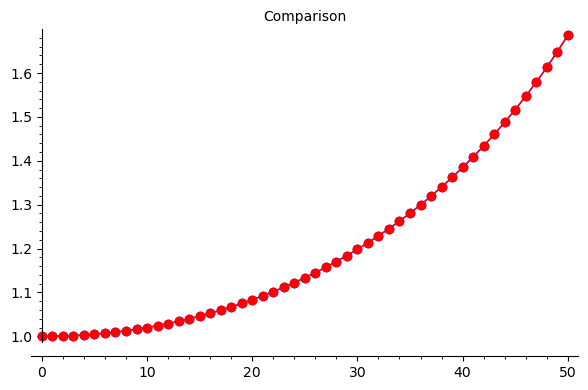

In [64]:
from sage.plot.line import Line

n = 50
h = 0.01

def f(x, y):
    return 2 * x * (1 + y^2)

x = zero_vector(RR, n + 1)
y = zero_vector(RR, n + 1)
y_exact = zero_vector(RR, n + 1)

x[0] = 0
y[0] = 1
y_exact[0] = tan(1 / 4 * pi + x[0]^2)
for k in range(1, n + 1):
    x[k] = x[k - 1] + h
    y[k] = y[k - 1] + 1 / 2 * h * f(x[k - 1], y[k - 1]) + 1 / 2 * h * f(x[k - 1] + h, y[k - 1] + h * f(x[k - 1], y[k - 1]))
    y_exact[k] = tan(1 / 4 * pi + x[k]^2)

show('Exact value:')
show(y_exact[n])
show('Improved Euler approximation value:')
show(y[n])
show('Error:')
show(y_exact[n] - y[n])

show(line(Line(range(n + 1), y_exact, {}), marker='o', color='blue', title='Exact'))
show(line(Line(range(n + 1), y, {}), marker='o', color='red', title='Improved Euler approximation'))

line_1 = line(Line(range(n + 1), y_exact, {}), marker='o', color='blue', title='Comparison')
line_2 = line(Line(range(n + 1), y, {}), marker='o', color='red')
show(line_1 + line_2)